In [1]:
import pandas as pd

file_path = '/content/outbreaks.csv'
data = pd.read_csv(file_path)
print("Dataset Info:")
print(data.info())
print("\nSample Data:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19119 entries, 0 to 19118
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               19119 non-null  int64  
 1   Month              19119 non-null  object 
 2   State              19119 non-null  object 
 3   Location           16953 non-null  object 
 4   Food               10156 non-null  object 
 5   Ingredient         1876 non-null   object 
 6   Species            12500 non-null  object 
 7   Serotype/Genotype  3907 non-null   object 
 8   Status             12500 non-null  object 
 9   Illnesses          19119 non-null  int64  
 10  Hospitalizations   15494 non-null  float64
 11  Fatalities         15518 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 1.8+ MB
None

Sample Data:
   Year    Month       State                Location  \
0  1998  January  California              Restaurant   
1  1998  Jan

In [2]:
data['Location'].fillna('Unknown', inplace=True)
data['Species'].fillna('Unknown', inplace=True)
data['Hospitalizations'].fillna(0, inplace=True)
data['Fatalities'].fillna(0, inplace=True)

print("Missing values handled.")


Missing values handled.


<ipython-input-2-3175d0ac5231>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Location'].fillna('Unknown', inplace=True)
<ipython-input-2-3175d0ac5231>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

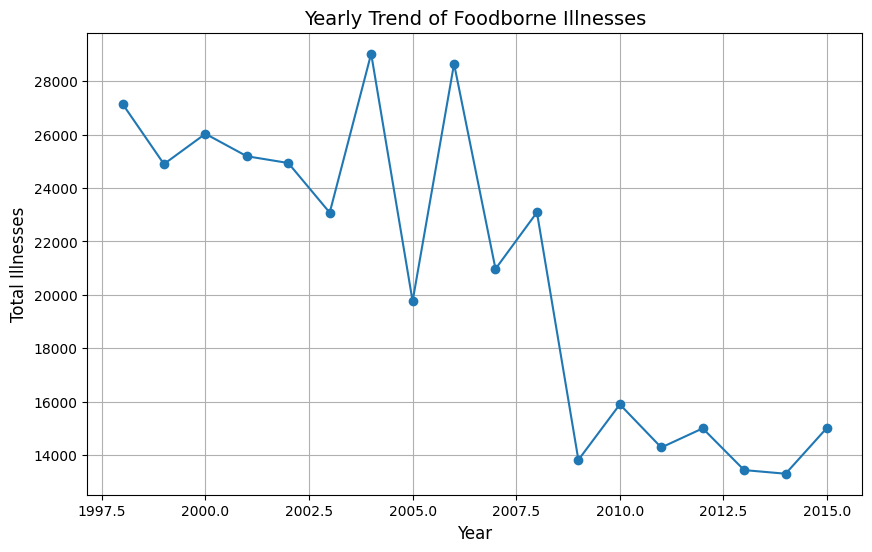


Yearly Illnesses Trend:
 Year
1998    27156
1999    24899
2000    26033
2001    25192
2002    24939
2003    23079
2004    29034
2005    19761
2006    28656
2007    20970
2008    23089
2009    13813
2010    15893
2011    14278
2012    14995
2013    13431
2014    13295
2015    15018
Name: Illnesses, dtype: int64


In [3]:
import matplotlib.pyplot as plt

yearly_trend = data.groupby('Year')['Illnesses'].sum()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', linestyle='-')
plt.title('Yearly Trend of Foodborne Illnesses', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Illnesses', fontsize=12)
plt.grid(True)
plt.show()

print("\nYearly Illnesses Trend:\n", yearly_trend)


In [4]:
contaminant_impact = data.groupby('Species').agg({
    'Illnesses': 'sum',
    'Hospitalizations': 'sum',
    'Fatalities': 'sum'
}).sort_values(by='Illnesses', ascending=False)

# Display top 5 contaminants
print("\nTop 5 Contaminants:\n", contaminant_impact.head(5))



Top 5 Contaminants:
                          Illnesses  Hospitalizations  Fatalities
Species                                                         
Unknown                      77954             967.0        27.0
Norovirus genogroup I        76406             668.0         2.0
Salmonella enterica          60018            6888.0        82.0
Norovirus genogroup II       38175             518.0         6.0
Clostridium perfringens      28734             106.0        12.0


In [5]:
location_risk = data.groupby('Location')['Illnesses'].sum().sort_values(ascending=False)

# Display top 5 high-risk locations
print("\nTop 5 High-Risk Locations:\n", location_risk.head(5))



Top 5 High-Risk Locations:
 Location
Restaurant                131970
Unknown                    66015
Catering Service           36044
Private Home/Residence     22564
Prison/Jail                20608
Name: Illnesses, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

features = data[['Hospitalizations', 'Fatalities']].fillna(0)
target = data['Illnesses']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("\nModel Accuracy (R^2):", score)

predictions = model.predict(X_test[:5])
print("\nSample Predictions:\n", predictions)



Model Accuracy (R^2): -0.03982444362794335

Sample Predictions:
 [16.68060166 16.68060166 16.68060166 21.85633102 16.68060166]


In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

features = data[['Hospitalizations', 'Fatalities']].fillna(0)
target = data['Illnesses']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

# Evaluate the model on test data
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"\nMean Squared Error: {mse}")
print(f"Model R^2 Score: {best_model.score(X_test, y_test)}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits

Mean Squared Error: 1840.6284732442152
Model R^2 Score: 0.03278936165014601


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(64, activation='relu', input_shape=(features.shape[1],)),
    Dropout(0.2),  # Dropout to reduce overfitting
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, callbacks=[early_stop])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nModel Loss: {loss}, Mean Absolute Error: {mae}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2569.8167 - mae: 17.6265 - val_loss: 2714.3367 - val_mae: 18.3191
Epoch 2/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2298.2805 - mae: 17.4736 - val_loss: 2709.1772 - val_mae: 18.4889
Epoch 3/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2279.6726 - mae: 18.5704 - val_loss: 2704.5642 - val_mae: 18.4351
Epoch 4/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1627.0358 - mae: 17.1545 - val_loss: 2711.0750 - val_mae: 19.8692
Epoch 5/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2088.1294 - mae: 18.9863 - val_loss: 2702.1313 - val_mae: 18.0830
Epoch 6/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2436.0620 - mae: 18.2490 - val_loss: 2702.1091 - val_mae: 18.7988
Epoch 7/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2021.6630 - mae: 17.5960 - val_loss: 2690.2832 - val_mae: 18.7323
Epoch 8/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1445.6866 - mae: 16.8872 - val_loss: 2687.2249 - val_mae: 

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(features.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)  # Try lower values like 0.0005
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])


In [12]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop])


Epoch 1/100
765/765 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 2756.3650 - mae: 18.5640 - val_loss: 2711.2603 - val_mae: 17.4205
Epoch 2/100
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2344.8628 - mae: 18.0665 - val_loss: 2675.4773 - val_mae: 18.2669
Epoch 3/100
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1856.1418 - mae: 17.8346 - val_loss: 2673.3879 - val_mae: 18.2348
Epoch 4/100
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1889.5085 - mae: 17.6527 - val_loss: 2660.7422 - val_mae: 19.3547
Epoch 5/100
765/765 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1887.4961 - mae: 17.8851 - val_loss: 2673.7817 - val_mae: 18.1554
Epoch 6/100
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1759.5262 - mae: 17.5451 - val_loss: 2657.7292 - val_mae: 19.3762
Epoch 7/100
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2078.3997 - mae: 17.8431 - val_loss: 2659.5417 - val_mae: 18.2778
Epoch 8/100
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2185.0061 - mae: 17.9683 - val_loss: 2683.6318 - v

In [13]:
data['Illness_per_Hospitalization'] = data['Illnesses'] / (data['Hospitalizations'] + 1)


In [14]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(features.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [17]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=16)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Updated Model Loss: {loss}, Mean Absolute Error: {mae}")


Epoch 1/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2148.1621 - mae: 18.1356 - val_loss: 2689.0112 - val_mae: 19.2673
Epoch 2/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1670.9867 - mae: 16.9510 - val_loss: 2666.6917 - val_mae: 19.7216
Epoch 3/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1967.6786 - mae: 17.9131 - val_loss: 2660.2505 - val_mae: 20.4114
Epoch 4/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2111.8721 - mae: 17.9693 - val_loss: 2663.5566 - val_mae: 18.9550
Epoch 5/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1768.8708 - mae: 17.1263 - val_loss: 2686.1194 - val_mae: 19.1651
Epoch 6/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2468.8665 - mae: 18.2981 - val_loss: 2674.3425 - val_mae: 18.9747
Epoch 7/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1755.8271 - mae: 17.5662 - val_loss: 2670.0403 - val_mae: 19.7749
Epoch 8/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2002.6479 - mae: 18.1418 - val_loss: 2669.8228 - val_mae: 

In [18]:
from sklearn.metrics import r2_score

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"Model Accuracy (R² Score): {r2:.4f}")


120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Model Accuracy (R² Score): 0.0588


In [ ]:
#THIS IS THE FINAL STEPS WE CAN TRAIN THE MODEL TO THE FULL ACCURACY......